In [1]:
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np

/mnt/kauffman/nbserver/jupyter-run-software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import matplotlib.colors as colors
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
	"""
	Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

	e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
	"""
	def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
		self.midpoint = midpoint
		colors.Normalize.__init__(self, vmin, vmax, clip)

	def __call__(self, value, clip=None):
		# I'm ignoring masked values and all kinds of edge cases to make a
		# simple example...
		x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
		return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [3]:
data = pd.read_csv('data/data_new_june28.tab', sep='\t' ,index_col=0)

In [4]:
fc_bf = []
fc_bs = []
bfpval = []
bspval = []
gene_list = []
method_list = []
for gene in data.index.unique():
    df = data.loc[gene]
    for m in df['method'].unique():
        df_m = df[df['method'] == m]
        es = df_m[df_m['celltype'] == 'es']
        fib = df_m[df_m['celltype'] == 'fib']
        gene_list.append(gene)
        method_list.append(m)
        fc_bf.append(np.log10(es['kon']/fib['kon']))
        fc_bs.append(np.log10((es['ksyn']/es['koff'])/(fib['ksyn']/fib['koff'])))
        bfpval.append(np.log10(es['bfpval']))
        bspval.append(np.log10(es['bspval']))

In [5]:
heatmap_fc = np.array([])
for bf, bs in zip(np.array(fc_bf).reshape(4,2), np.array(fc_bs).reshape(4,2)):
    heatmap_fc = np.concatenate((heatmap_fc, bf))
    heatmap_fc = np.concatenate((heatmap_fc, bs))

In [6]:
param_list = ['bf' if i % 2 == 0 else 'bs' for i in np.arange(8) ]

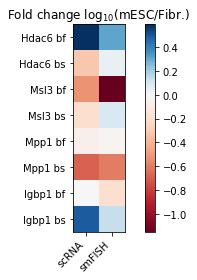

In [7]:
elev_min = min(heatmap_fc)
elev_max = max(heatmap_fc)
mid_val = 0
plt.imshow(heatmap_fc.reshape(8,2), cmap='RdBu', clim=(elev_min, elev_max), norm=MidpointNormalize(midpoint=mid_val,vmin=elev_min, vmax=elev_max))
plt.yticks(np.arange(8), ['{} {}'.format(g,m) for g,m in zip(gene_list,param_list)])
plt.title('Fold change log$_{10}$(mESC/Fibr.)')
plt.xticks(np.arange(2), ['scRNA', 'smFISH'], rotation=45, ha='right')
plt.colorbar()
plt.tight_layout()
plt.savefig('figures/Fig3e_burst_kinetics.pdf')
plt.show()

In [8]:
heatmap_p = np.array([])
for bf, bs in zip(np.array(bfpval).reshape(4,2), np.array(bspval).reshape(4,2)):
    heatmap_p = np.concatenate((heatmap_p, bf))
    heatmap_p = np.concatenate((heatmap_p, bs))

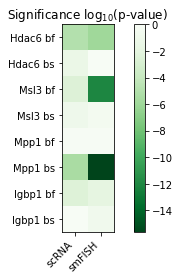

In [9]:
plt.imshow(heatmap_p.reshape(8,2), cmap='Greens_r')
plt.yticks(np.arange(8), ['{} {}'.format(g,m) for g,m in zip(gene_list,param_list)])
plt.title('Significance log$_{10}$(p-value)')
plt.xticks(np.arange(2),['scRNA', 'smFISH'], rotation=45, ha='right')
plt.colorbar()
plt.tight_layout()
plt.savefig('figures/Fig3e_significance.pdf')
plt.show()

In [10]:
# simple test, drawing RNA copies per cell distributions for selected parameters
def plotHist(vals, g, typ):
    plt.figure(figsize=(4,4))
    plt.hist(vals, bins=10)
    plt.title('{} {}'.format(g, typ))
    plt.xlabel("RNA copies per cell")
    plt.ylabel("Number of observations")
    plt.savefig('figures/ExtDataFig7a_d_scRNA_{}_{}_hist.pdf'.format(typ, g))
    plt.show()

In [11]:
fib = pd.read_csv('data/SS3_active_X_UMI.csv', index_col=0)
es = pd.read_csv('data/SS3_c57_UMIs_mESC.csv', index_col=0)

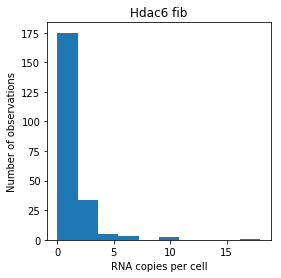

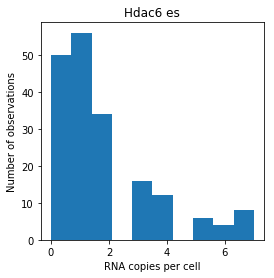

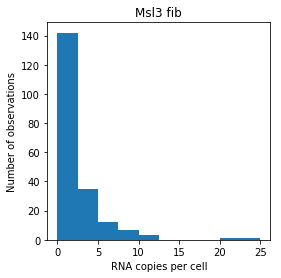

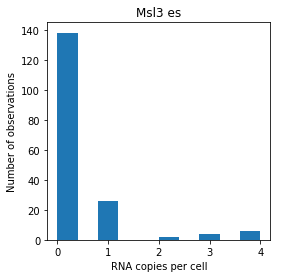

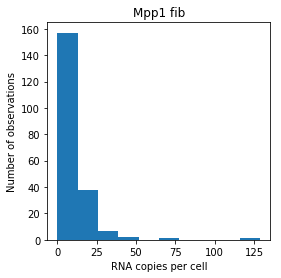

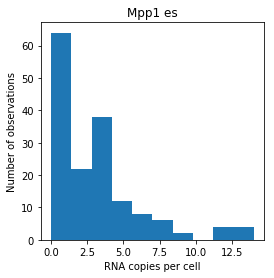

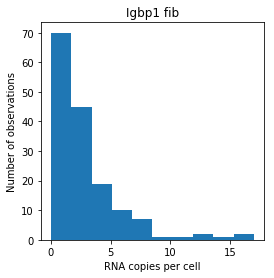

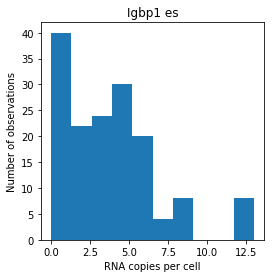

In [12]:
for gene in data.index.unique():
    plotHist(fib.loc[gene][pd.notnull(fib.loc[gene])], gene, 'fib')
    plotHist(es.loc[gene][pd.notnull(es.loc[gene])], gene, 'es')

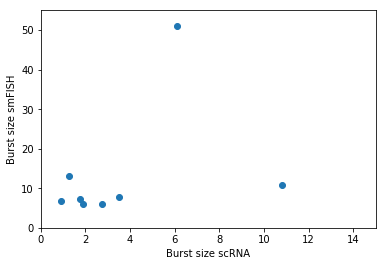

In [13]:
plt.scatter(data[data['method'] == 'scRNA']['ksyn']/data[data['method'] == 'scRNA']['koff'], data[data['method'] == 'fish']['ksyn']/data[data['method'] == 'fish']['koff'])
plt.xlabel('Burst size scRNA')
plt.ylabel('Burst size smFISH')
plt.xlim((0,15))
plt.ylim((0,55))
plt.savefig('figures/ExtDataFig7e.pdf')

plt.show()

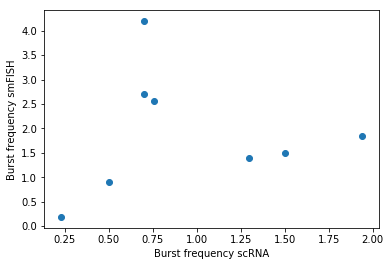

In [15]:
plt.scatter(data[data['method'] == 'scRNA']['kon'], data[data['method'] == 'fish']['kon'])
plt.xlabel('Burst frequency scRNA')
plt.ylabel('Burst frequency smFISH')
plt.savefig('figures/ExtDataFig7f.pdf')
plt.show()